In [24]:
# --- Análise de Problemas de Qualidade de Dados ---

import pandas as pd

# Carregar datasets
clientes = pd.read_csv('./datasets/clientes.csv')
produtos = pd.read_csv('./datasets/produtos.csv')
vendas = pd.read_csv('./datasets/vendas.csv')
logistica = pd.read_csv('./datasets/logistica.csv')

# Função para mostrar problemas de duplicidade
def checar_duplicatas(df, colunas, nome):
    duplicados = df.duplicated(subset=colunas).sum()
    print(f'Duplicatas em {nome}: {duplicados} registros')
    return duplicados

# Função para mostrar campos nulos
def checar_nulos(df, nome):
    nulos = df.isnull().sum()
    print(f'\nCampos nulos em {nome}:\n{nulos}')
    return nulos

# Função para validar formato de email
def checar_emails_invalidos(df, coluna):
    invalidos = df[~df[coluna].str.contains(r'^[\w\.-]+@[\w\.-]+\.\w+$', na=False)]
    print(f'\nEmails inválidos: {len(invalidos)}')
    return invalidos

# Função para valores negativos
def checar_valores_negativos(df, coluna, nome):
    negativos = df[df[coluna] < 0]
    print(f'\nValores negativos em {nome}: {len(negativos)}')
    return negativos

# --- Análise dos problemas ---

# Clientes
checar_duplicatas(clientes, ['id_cliente', 'email'], 'clientes')
checar_nulos(clientes, 'clientes')
checar_emails_invalidos(clientes, 'email')

# Produtos
checar_duplicatas(produtos, ['id_produto', 'nome_produto'], 'produtos')
checar_nulos(produtos, 'produtos')
checar_valores_negativos(produtos, 'preco', 'produtos')

# Vendas
checar_valores_negativos(vendas, 'valor_total', 'vendas')
checar_valores_negativos(vendas, 'quantidade', 'vendas')

# Logística
checar_nulos(logistica, 'logistica')

# --- Classificação por dimensão da qualidade ---
dimensoes = {
    'Completude': ['Campos obrigatórios vazios'],
    'Unicidade': ['Dados duplicados'],
    'Validade': ['Emails inválidos', 'Valores negativos'],
    'Consistência': ['Formatos inconsistentes'],
    'Integridade Referencial': ['Chaves estrangeiras inexistentes'],
    'Rastreabilidade': ['Falta de auditoria']
}

print("Dimensões da Qualidade e exemplos de problemas:")
for dim, exemplos in dimensoes.items():
    print(f"\n- {dim}: {', '.join(exemplos)}")

# --- Cálculo de impacto (exemplo para campos nulos em clientes) ---
total_clientes = len(clientes)
nulos_nome = clientes['nome'].isnull().sum()
impacto_nome = nulos_nome / total_clientes * 100
print(f"\nImpacto de nomes nulos em clientes: {impacto_nome:.2f}%")

# Repita para outros problemas conforme necessário

# --- Priorização dos problemas ---
# Exemplo: criar um DataFrame com problemas, dimensão, impacto e criticidade
problemas = [
    {'problema': 'Duplicidade de clientes', 'dimensao': 'Unicidade', 'impacto': checar_duplicatas(clientes, ['id_cliente', 'email'], 'clientes') / total_clientes * 100, 'criticidade': 'Alta'},
    {'problema': 'Campos obrigatórios vazios (nome)', 'dimensao': 'Completude', 'impacto': impacto_nome, 'criticidade': 'Alta'},
    # Adicione outros problemas...
]
df_problemas = pd.DataFrame(problemas)
print(f"\n{df_problemas}")


Duplicatas em clientes: 1 registros

Campos nulos em clientes:
id_cliente         0
nome               2
email              2
telefone           0
data_nascimento    0
cidade             0
estado             0
data_cadastro      0
dtype: int64

Emails inválidos: 4
Duplicatas em produtos: 0 registros

Campos nulos em produtos:
id_produto      0
nome_produto    1
categoria       1
preco           0
estoque         0
data_criacao    0
ativo           0
dtype: int64

Valores negativos em produtos: 1

Valores negativos em vendas: 1

Valores negativos em vendas: 1

Campos nulos em logistica:
id_entrega               0
id_venda                 0
transportadora           2
data_envio               1
data_entrega_prevista    2
data_entrega_real        5
status_entrega           0
dtype: int64
Dimensões da Qualidade e exemplos de problemas:

- Completude: Campos obrigatórios vazios

- Unicidade: Dados duplicados

- Validade: Emails inválidos, Valores negativos

- Consistência: Formatos inconsist


Emails inválidos: 4

Impacto de emails inválidos em clientes: 25.00%
Duplicatas em produtos: 0 registros

Impacto de duplicidade em produtos: 0.00%

Valores negativos em produtos: 1

Impacto de preços negativos em produtos: 5.00%

Valores negativos em vendas: 1

Impacto de vendas com quantidade negativa: 4.00%

Impacto de campos nulos em logística: 6.49%
Duplicatas em clientes: 1 registros

Resumo dos problemas priorizados:
                            problema    dimensao    impacto criticidade
0            Duplicidade de clientes   Unicidade   6.250000        Alta
1  Campos obrigatórios vazios (nome)  Completude  12.500000        Alta
2                   Emails inválidos    Validade  25.000000       Média
3            Duplicidade de produtos   Unicidade   0.000000       Média
4       Preços negativos em produtos    Validade   5.000000        Alta
5     Vendas com quantidade negativa    Validade   4.000000        Alta
6          Campos nulos em logística  Completude   6.493506       M

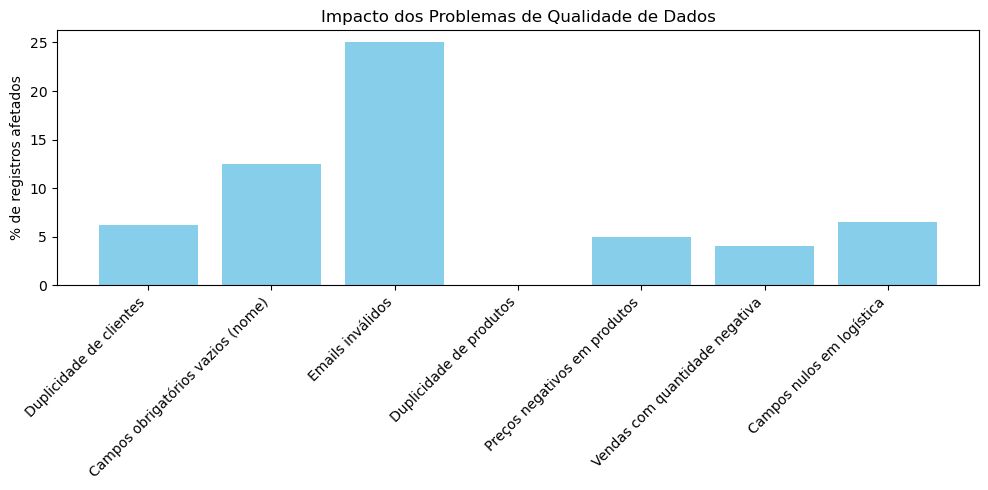

In [25]:
import matplotlib.pyplot as plt

# Impacto de emails inválidos em clientes
n_emails_invalidos = checar_emails_invalidos(clientes, 'email').shape[0]
impacto_email = n_emails_invalidos / total_clientes * 100
print(f"\nImpacto de emails inválidos em clientes: {impacto_email:.2f}%")

# Impacto de duplicidade em produtos
total_produtos = len(produtos)
duplicatas_produtos = checar_duplicatas(produtos, ['id_produto', 'nome_produto'], 'produtos')
impacto_duplicatas_produtos = duplicatas_produtos / total_produtos * 100
print(f"\nImpacto de duplicidade em produtos: {impacto_duplicatas_produtos:.2f}%")

# Impacto de preços negativos em produtos
precos_negativos = checar_valores_negativos(produtos, 'preco', 'produtos').shape[0]
impacto_precos_negativos = precos_negativos / total_produtos * 100
print(f"\nImpacto de preços negativos em produtos: {impacto_precos_negativos:.2f}%")

# Impacto de vendas com quantidade negativa
total_vendas = len(vendas)
quantidade_negativa = checar_valores_negativos(vendas, 'quantidade', 'vendas').shape[0]
impacto_quantidade_negativa = quantidade_negativa / total_vendas * 100
print(f"\nImpacto de vendas com quantidade negativa: {impacto_quantidade_negativa:.2f}%")

# Impacto de campos nulos em logística
total_logistica = len(logistica)
nulos_logistica = logistica.isnull().sum().sum()
impacto_nulos_logistica = nulos_logistica / (total_logistica * logistica.shape[1]) * 100
print(f"\nImpacto de campos nulos em logística: {impacto_nulos_logistica:.2f}%")

# Priorização dos problemas (exemplo expandido)
problemas = [
    {'problema': 'Duplicidade de clientes', 'dimensao': 'Unicidade', 'impacto': checar_duplicatas(clientes, ['id_cliente', 'email'], 'clientes') / total_clientes * 100, 'criticidade': 'Alta'},
    {'problema': 'Campos obrigatórios vazios (nome)', 'dimensao': 'Completude', 'impacto': impacto_nome, 'criticidade': 'Alta'},
    {'problema': 'Emails inválidos', 'dimensao': 'Validade', 'impacto': impacto_email, 'criticidade': 'Média'},
    {'problema': 'Duplicidade de produtos', 'dimensao': 'Unicidade', 'impacto': impacto_duplicatas_produtos, 'criticidade': 'Média'},
    {'problema': 'Preços negativos em produtos', 'dimensao': 'Validade', 'impacto': impacto_precos_negativos, 'criticidade': 'Alta'},
    {'problema': 'Vendas com quantidade negativa', 'dimensao': 'Validade', 'impacto': impacto_quantidade_negativa, 'criticidade': 'Alta'},
    {'problema': 'Campos nulos em logística', 'dimensao': 'Completude', 'impacto': impacto_nulos_logistica, 'criticidade': 'Média'},
    # Adicione outros problemas conforme necessário
]
df_problemas = pd.DataFrame(problemas)
print("\nResumo dos problemas priorizados:")
print(df_problemas)

# Visualização dos impactos
plt.figure(figsize=(10,5))
plt.bar(df_problemas['problema'], df_problemas['impacto'], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.ylabel('% de registros afetados')
plt.title('Impacto dos Problemas de Qualidade de Dados')
plt.tight_layout()
plt.show()
